# SHAP for Linear Models 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# set the fule URl and filename
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
filename = 'wine.csv'

# Check if the file is in the current directory
try:
    wine = pd.read_csv(filename)
except FileNotFoundError:
    print(f'Downloading {filename}from {url} ...')
    wine = pd.read_csv(url, sep=";")
    wine.to_csv(filename, index=False)
    print('Download complete!')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
summary = wine.describe().transpose().round(2)
summary = summary.drop("count", axis=1)

# create a markdown table
markdown_table = tabulate(
    summary, headers='keys', tablefmt='pipe'
)
print(markdown_table)

|                      |   mean |   std |   min |    25% |    50% |    75% |    max |
|:---------------------|-------:|------:|------:|-------:|-------:|-------:|-------:|
| fixed acidity        |   6.85 |  0.84 |  3.8  |   6.3  |   6.8  |   7.3  |  14.2  |
| volatile acidity     |   0.28 |  0.1  |  0.08 |   0.21 |   0.26 |   0.32 |   1.1  |
| citric acid          |   0.33 |  0.12 |  0    |   0.27 |   0.32 |   0.39 |   1.66 |
| residual sugar       |   6.39 |  5.07 |  0.6  |   1.7  |   5.2  |   9.9  |  65.8  |
| chlorides            |   0.05 |  0.02 |  0.01 |   0.04 |   0.04 |   0.05 |   0.35 |
| free sulfur dioxide  |  35.31 | 17.01 |  2    |  23    |  34    |  46    | 289    |
| total sulfur dioxide | 138.36 | 42.5  |  9    | 108    | 134    | 167    | 440    |
| density              |   0.99 |  0    |  0.99 |   0.99 |   0.99 |   1    |   1.04 |
| pH                   |   3.19 |  0.15 |  2.72 |   3.09 |   3.18 |   3.28 |   3.82 |
| sulphates            |   0.49 |  0.11 |  0.22 |   0.

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
wine.shape

(4898, 12)

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


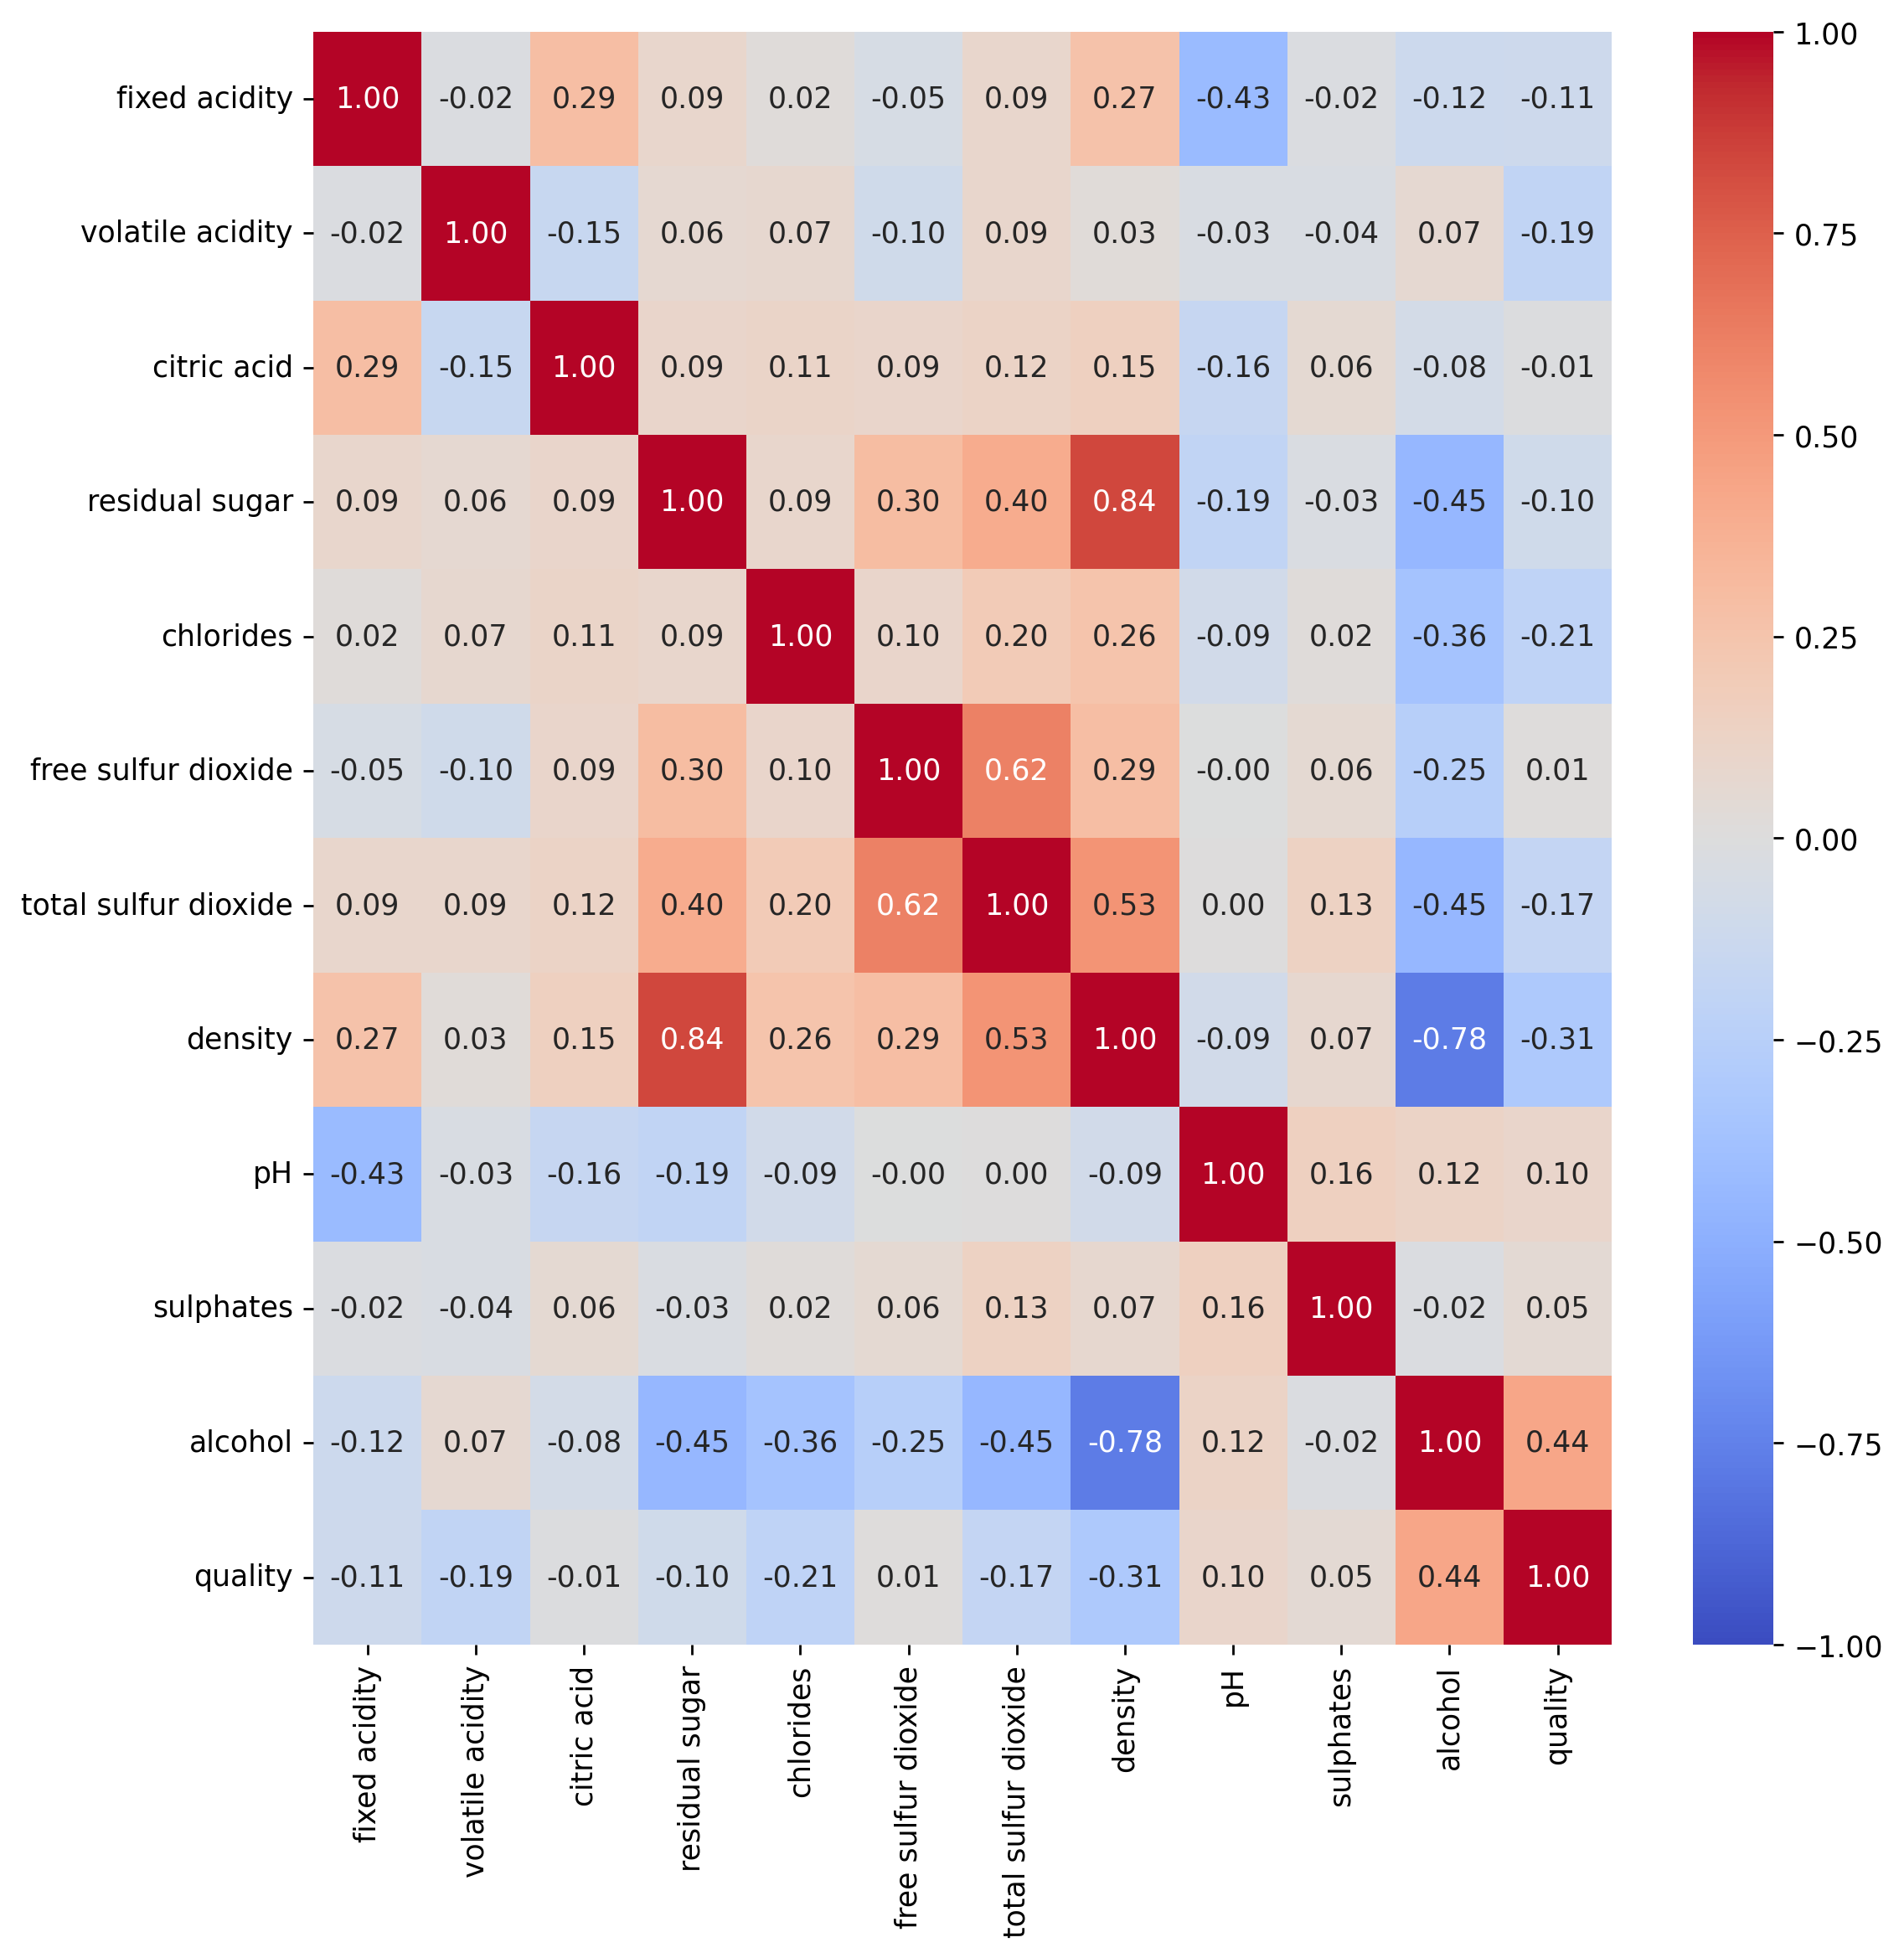

In [32]:
plt.figure(figsize=(10,10), dpi=250)
sns.heatmap(data=wine.corr(), annot=True, fmt="0.2f", vmax=1, vmin=-1, cmap="coolwarm");

In [5]:
y = wine['quality']
X = wine.drop('quality', axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create the Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [8]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 0.586
MSE: 0.569
RMSE: 0.754


### Interpreting the Coefficients

In [9]:
coefs = pd.DataFrame({
    'feature': X.columns.values,
    'coefficient': np.round(model.coef_, 3)
}) 
print(coefs.to_markdown(index=False))

| feature              |   coefficient |
|:---------------------|--------------:|
| fixed acidity        |         0.046 |
| volatile acidity     |        -1.915 |
| citric acid          |        -0.061 |
| residual sugar       |         0.071 |
| chlorides            |        -0.026 |
| free sulfur dioxide  |         0.005 |
| total sulfur dioxide |        -0     |
| density              |      -124.264 |
| pH                   |         0.601 |
| sulphates            |         0.649 |
| alcohol              |         0.229 |


## SHAP Values

In [34]:
explainer = shap.LinearExplainer(model, X_train)

In [35]:
shap_values = explainer(X_test)

In [36]:
print(shap_values.values)

[[-0.03479769  0.00306381 -0.00545601 ... -0.06541621  0.05289943
   0.08545841]
 [-0.06234203 -0.45650842  0.00986986 ...  0.00066077  0.01395506
   0.59691113]
 [ 0.01570028  0.07965919 -0.00422994 ...  0.04871676 -0.05095221
   0.36790245]
 ...
 [-0.03938841  0.06051034  0.00680469 ...  0.04871676 -0.05095221
  -0.250421  ]
 [ 0.03406317  0.00306381  0.00067434 ... -0.07142321  0.02044579
  -0.29622273]
 [-0.00266262  0.13710572 -0.00422994 ...  0.18087073 -0.0249893
  -0.13591665]]


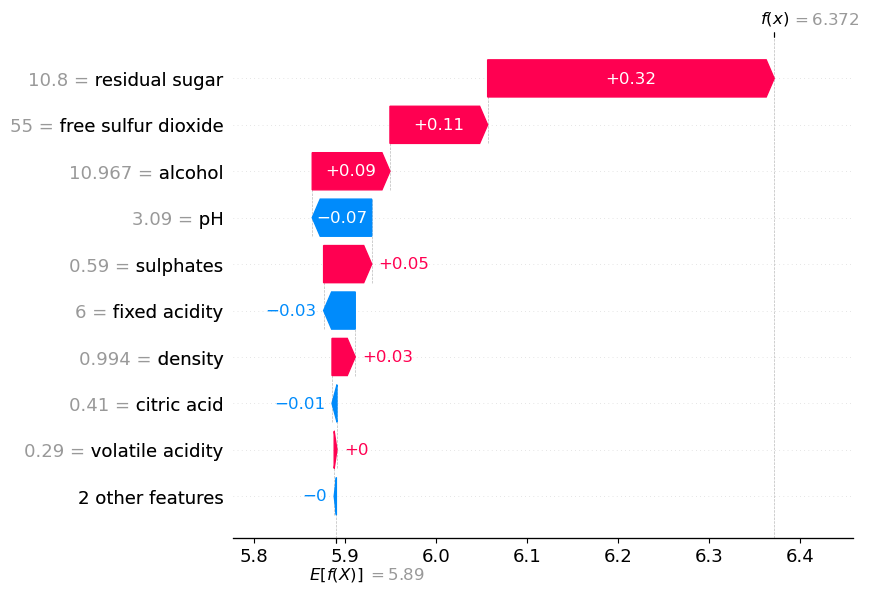

In [39]:
shap.plots.waterfall(shap_values[0])

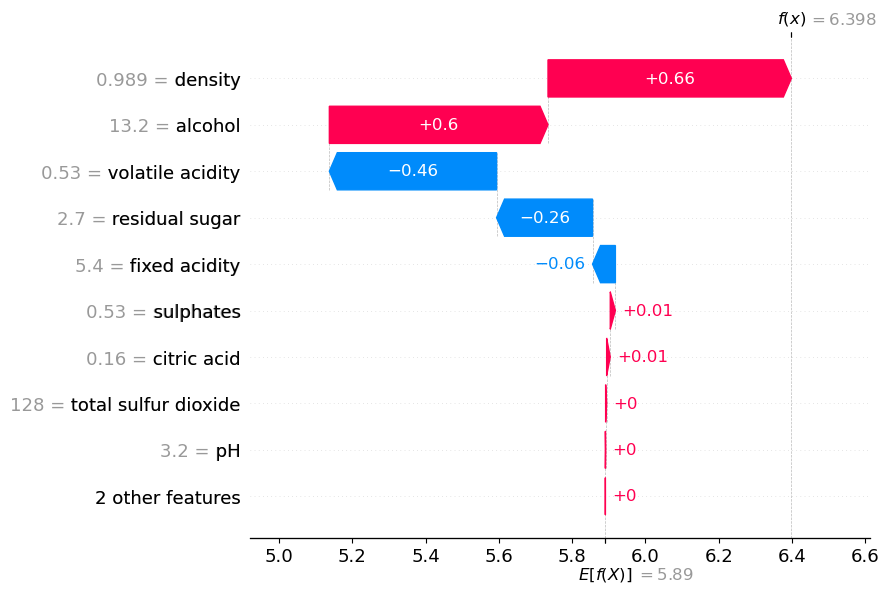

In [40]:
shap.plots.waterfall(shap_values[1])

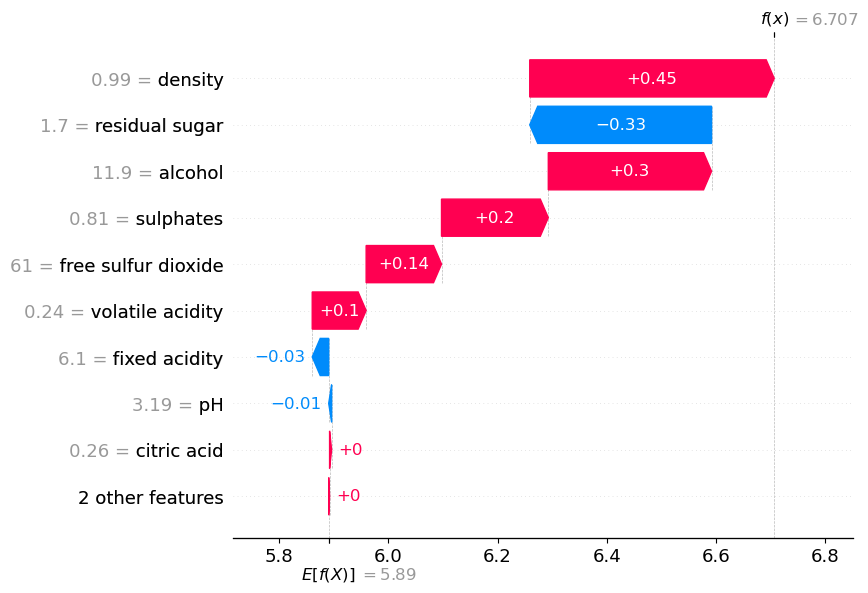

In [41]:
shap.plots.waterfall(shap_values[63])

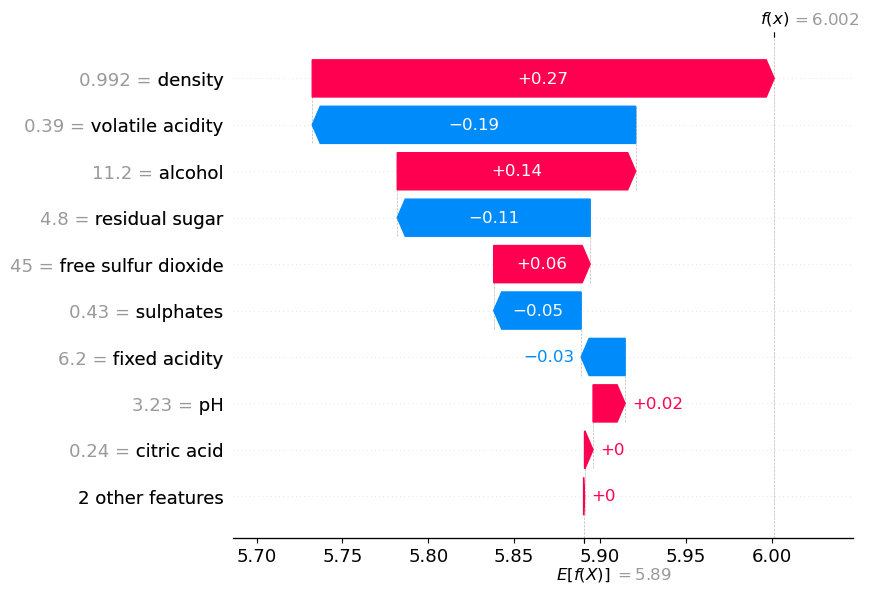

In [42]:
shap.plots.waterfall(shap_values[549])

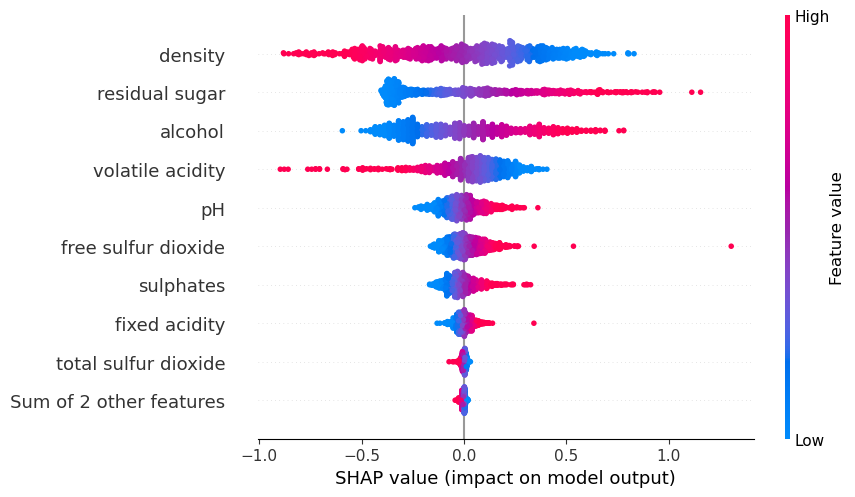

In [43]:
shap.plots.beeswarm(shap_values)